# ANN to clssify images contained in the MNIST dataset in Tensorflow

Simplest neural net - Perceptron consists of 1 or more inputs, processor and a single output 

Follows feed-forward model

Perceptron has 4 main steps - 
1) recieve inputs 
2) weigh inputs 
3) Sum inputs 
4) generate output

Intially weights are assigned randomly 

Output generated by passing the sum through some sort of activation fucntion 

In case of binary output for example it might tell the perceptron to fire/not fire 

Steps of preceptron broadly - 

1. provide perceptron with inputs for which there is a known answer 

2. basis the weights and bias let perceptron guess the answer 

3. Compute error 

4. Adjust weights according to the error 

5. return to step 1 as needed 

# Multi Layer Perceptron

In [56]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [57]:
# we will use the mnist data which contains handwritten images of numbers 

In [58]:
from tensorflow.examples.tutorials.mnist import input_data

In [59]:
# creating a temperory dataset
# the one_hot keyword enables one hot encoding for our categorical variable 
# which means 3 is coded as (0010000) 5=(0000100) and so on 
mnist= input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [61]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [62]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [63]:
type(mnist.train.images)

numpy.ndarray

In [65]:
mnist.train.images.shape

(55000, 784)

In [66]:
mnist.train.images[2]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [67]:
mnist.train.images[2].shape

(784,)

In [70]:
np.sqrt(784)

28.0

In [71]:
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

Mostly zeros but some have values 

These values can range from 0 to 1 

Basically these values represnt the darkness of the pixels in the array

Let us try to visualize the array using matplotlib

In [72]:
sample=mnist.train.images[2].reshape(28,28)

Matplotlib has a built in fucntion called imshow that can visualize a 2-d matrix

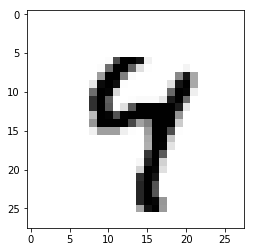

In [76]:
plt.imshow(sample,cmap='Greys')
# this ones fairly easy to make out that it's a 4 
# many images in this dataset are difficult to make out also 

# defining parameters to be used while building multilayer perceptron

In [120]:
learning_rate=0.001
training_epochs= 15
batch_size= 100

In [121]:
n_classes=10
n_samples=mnist.train.num_examples

In [122]:
mnist.train.num_examples

55000

In [123]:
n_input=784

number of neurons we need in the two hidden layers we are building 
common number to use for images is 256 because of the way computer stored colors  as 8-bit color storage

In [124]:
n_hidden_1=256
n_hidden_2=256

Hidden layers will transform the data. It will go through layer 1 then layer 2.Once the data has been
multiplied by weights and reaches the output layers evaluation begins. 

Cost function evaluataes how far we are from the actual value. in our case we will check how many classes 
did we get correct.

Optimization fucntion tries to minimize the error/cost to get better accuracy.This is achieved by adjusting 
the weight values across the entire network

learning rate parameter will decide how quickly we wish to adjust the optimization function. Lower the
rate the higher the possibility of accurate training results.

# Defining the multilayer perceptron model


In [125]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: this is a placeholder for data input  
    weights: Dictionary of assigned weights
    Biases: Dictionary of assigned biases 
    '''
    # Perceptrons need an activation fucntion. we will use the RELU fucntion
    # First hidden layer with RELU activation
    # x=weights + bias
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X*W+B) –> f(x)= max(0,x)
    layer_1=tf.nn.relu(layer_1)
    # second hidden layer 
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.relu(layer_2)
    # last output layer 
    out_layer=tf.add(tf.matmul(layer_2,weights['out']),biases['out'])
    return out_layer

In [127]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [128]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [129]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder('float',[None,n_classes])

# Fitting the model

In [130]:
pred= multilayer_perceptron(x,weights,biases)

In [131]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Model Training

mnist has a built in fucntion where we can pass a number n and it will return a tuple of n samples from the dataset

In [132]:
t=mnist.train.next_batch(10)

In [133]:
t

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [134]:
t=mnist.train.next_batch(1)

In [135]:
xsamp,ysamp=t

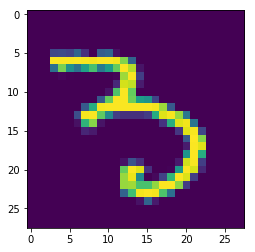

In [136]:
plt.imshow(xsamp.reshape(28,28))

In [137]:
xsamp

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [138]:
ysamp

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

# Running Session

In [139]:
sess= tf.InteractiveSession()

In [140]:
init=tf.initialize_all_variables()

In [141]:
sess.run(init)

In [144]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
        print("Epoch: {} cost {:.4f}".format(epoch+1,avg_cost))
print('Model has completed {} epochs of training'.format(training_epochs))        

Epoch: 1 cost 3.0995
Epoch: 1 cost 5.9859
Epoch: 1 cost 8.7421
Epoch: 1 cost 11.4193
Epoch: 1 cost 13.7762
Epoch: 1 cost 16.1755
Epoch: 1 cost 18.3987
Epoch: 1 cost 20.6895
Epoch: 1 cost 22.4966
Epoch: 1 cost 24.1927
Epoch: 1 cost 26.1946
Epoch: 1 cost 27.9865
Epoch: 1 cost 29.7470
Epoch: 1 cost 31.4608
Epoch: 1 cost 33.2869
Epoch: 1 cost 34.9927
Epoch: 1 cost 36.5810
Epoch: 1 cost 38.2515
Epoch: 1 cost 39.6590
Epoch: 1 cost 41.1895
Epoch: 1 cost 42.5742
Epoch: 1 cost 44.1547
Epoch: 1 cost 45.4735
Epoch: 1 cost 46.9363
Epoch: 1 cost 48.2750
Epoch: 1 cost 49.4858
Epoch: 1 cost 50.5150
Epoch: 1 cost 51.8848
Epoch: 1 cost 53.1385
Epoch: 1 cost 54.2109
Epoch: 1 cost 55.3486
Epoch: 1 cost 56.0828
Epoch: 1 cost 57.2076
Epoch: 1 cost 58.4135
Epoch: 1 cost 59.3210
Epoch: 1 cost 60.1490
Epoch: 1 cost 61.1347
Epoch: 1 cost 62.0295
Epoch: 1 cost 62.9481
Epoch: 1 cost 63.9049
Epoch: 1 cost 64.6801
Epoch: 1 cost 65.6277
Epoch: 1 cost 66.3924
Epoch: 1 cost 67.0977
Epoch: 1 cost 67.8143
Epoch: 1 cost

Epoch: 1 cost 148.5864
Epoch: 1 cost 148.6834
Epoch: 1 cost 148.7969
Epoch: 1 cost 148.9504
Epoch: 1 cost 149.0791
Epoch: 1 cost 149.2172
Epoch: 1 cost 149.3192
Epoch: 1 cost 149.3974
Epoch: 1 cost 149.5328
Epoch: 1 cost 149.6305
Epoch: 1 cost 149.6859
Epoch: 1 cost 149.8658
Epoch: 1 cost 150.0497
Epoch: 1 cost 150.2120
Epoch: 1 cost 150.4349
Epoch: 1 cost 150.5772
Epoch: 1 cost 150.6461
Epoch: 1 cost 150.8094
Epoch: 1 cost 150.9903
Epoch: 1 cost 151.0654
Epoch: 1 cost 151.1974
Epoch: 1 cost 151.2764
Epoch: 1 cost 151.3514
Epoch: 1 cost 151.4305
Epoch: 1 cost 151.4835
Epoch: 1 cost 151.5962
Epoch: 1 cost 151.6938
Epoch: 1 cost 151.7646
Epoch: 1 cost 151.9726
Epoch: 1 cost 152.1888
Epoch: 1 cost 152.4235
Epoch: 1 cost 152.5874
Epoch: 1 cost 152.6588
Epoch: 1 cost 152.7384
Epoch: 1 cost 152.8778
Epoch: 1 cost 152.9783
Epoch: 1 cost 153.0885
Epoch: 1 cost 153.2339
Epoch: 1 cost 153.2718
Epoch: 1 cost 153.3940
Epoch: 1 cost 153.4922
Epoch: 1 cost 153.6493
Epoch: 1 cost 153.7404
Epoch: 1 co

Epoch: 2 cost 18.6987
Epoch: 2 cost 18.7547
Epoch: 2 cost 18.8454
Epoch: 2 cost 18.9008
Epoch: 2 cost 18.9293
Epoch: 2 cost 18.9966
Epoch: 2 cost 19.0757
Epoch: 2 cost 19.1795
Epoch: 2 cost 19.2173
Epoch: 2 cost 19.2584
Epoch: 2 cost 19.3505
Epoch: 2 cost 19.4083
Epoch: 2 cost 19.4797
Epoch: 2 cost 19.5502
Epoch: 2 cost 19.5855
Epoch: 2 cost 19.7015
Epoch: 2 cost 19.7381
Epoch: 2 cost 19.7863
Epoch: 2 cost 19.9371
Epoch: 2 cost 19.9899
Epoch: 2 cost 20.0905
Epoch: 2 cost 20.1273
Epoch: 2 cost 20.1534
Epoch: 2 cost 20.2065
Epoch: 2 cost 20.2886
Epoch: 2 cost 20.3686
Epoch: 2 cost 20.4100
Epoch: 2 cost 20.4749
Epoch: 2 cost 20.5575
Epoch: 2 cost 20.6365
Epoch: 2 cost 20.6883
Epoch: 2 cost 20.7306
Epoch: 2 cost 20.7742
Epoch: 2 cost 20.8143
Epoch: 2 cost 20.9128
Epoch: 2 cost 20.9630
Epoch: 2 cost 21.0367
Epoch: 2 cost 21.1020
Epoch: 2 cost 21.1480
Epoch: 2 cost 21.1758
Epoch: 2 cost 21.2073
Epoch: 2 cost 21.3041
Epoch: 2 cost 21.3442
Epoch: 2 cost 21.4345
Epoch: 2 cost 21.4698
Epoch: 2 c

Epoch: 3 cost 3.5676
Epoch: 3 cost 3.6092
Epoch: 3 cost 3.6371
Epoch: 3 cost 3.6858
Epoch: 3 cost 3.7838
Epoch: 3 cost 3.8080
Epoch: 3 cost 3.8644
Epoch: 3 cost 3.9129
Epoch: 3 cost 3.9781
Epoch: 3 cost 4.0180
Epoch: 3 cost 4.0493
Epoch: 3 cost 4.1103
Epoch: 3 cost 4.1874
Epoch: 3 cost 4.2106
Epoch: 3 cost 4.2292
Epoch: 3 cost 4.2623
Epoch: 3 cost 4.3240
Epoch: 3 cost 4.3957
Epoch: 3 cost 4.4561
Epoch: 3 cost 4.4769
Epoch: 3 cost 4.5268
Epoch: 3 cost 4.5656
Epoch: 3 cost 4.5999
Epoch: 3 cost 4.6518
Epoch: 3 cost 4.7058
Epoch: 3 cost 4.7334
Epoch: 3 cost 4.7617
Epoch: 3 cost 4.7819
Epoch: 3 cost 4.7932
Epoch: 3 cost 4.8576
Epoch: 3 cost 4.9162
Epoch: 3 cost 4.9654
Epoch: 3 cost 5.0629
Epoch: 3 cost 5.1294
Epoch: 3 cost 5.1348
Epoch: 3 cost 5.1919
Epoch: 3 cost 5.2361
Epoch: 3 cost 5.2861
Epoch: 3 cost 5.3019
Epoch: 3 cost 5.3270
Epoch: 3 cost 5.3702
Epoch: 3 cost 5.4612
Epoch: 3 cost 5.4797
Epoch: 3 cost 5.5381
Epoch: 3 cost 5.6231
Epoch: 3 cost 5.6388
Epoch: 3 cost 5.6553
Epoch: 3 cost

Epoch: 3 cost 20.6029
Epoch: 3 cost 20.6231
Epoch: 3 cost 20.6806
Epoch: 3 cost 20.7557
Epoch: 3 cost 20.7976
Epoch: 3 cost 20.8109
Epoch: 3 cost 20.9103
Epoch: 3 cost 20.9218
Epoch: 3 cost 20.9620
Epoch: 3 cost 21.0141
Epoch: 3 cost 21.0643
Epoch: 3 cost 21.0886
Epoch: 3 cost 21.0988
Epoch: 3 cost 21.1533
Epoch: 3 cost 21.1962
Epoch: 3 cost 21.2351
Epoch: 3 cost 21.3207
Epoch: 3 cost 21.3418
Epoch: 3 cost 21.4073
Epoch: 3 cost 21.4511
Epoch: 3 cost 21.5549
Epoch: 3 cost 21.5963
Epoch: 3 cost 21.6556
Epoch: 3 cost 21.6937
Epoch: 3 cost 21.7653
Epoch: 3 cost 21.8041
Epoch: 3 cost 21.8597
Epoch: 3 cost 21.8979
Epoch: 3 cost 21.9460
Epoch: 3 cost 22.0108
Epoch: 3 cost 22.0537
Epoch: 3 cost 22.1006
Epoch: 3 cost 22.1157
Epoch: 3 cost 22.1323
Epoch: 3 cost 22.1636
Epoch: 3 cost 22.2251
Epoch: 3 cost 22.2645
Epoch: 3 cost 22.3003
Epoch: 3 cost 22.3379
Epoch: 3 cost 22.3632
Epoch: 3 cost 22.3907
Epoch: 3 cost 22.3983
Epoch: 3 cost 22.4376
Epoch: 3 cost 22.4809
Epoch: 3 cost 22.5449
Epoch: 3 c

Epoch: 4 cost 9.9168
Epoch: 4 cost 9.9344
Epoch: 4 cost 9.9632
Epoch: 4 cost 9.9969
Epoch: 4 cost 10.0138
Epoch: 4 cost 10.0283
Epoch: 4 cost 10.0514
Epoch: 4 cost 10.0726
Epoch: 4 cost 10.0977
Epoch: 4 cost 10.1286
Epoch: 4 cost 10.1589
Epoch: 4 cost 10.1921
Epoch: 4 cost 10.2080
Epoch: 4 cost 10.2229
Epoch: 4 cost 10.2541
Epoch: 4 cost 10.2641
Epoch: 4 cost 10.3001
Epoch: 4 cost 10.3363
Epoch: 4 cost 10.3729
Epoch: 4 cost 10.4034
Epoch: 4 cost 10.4560
Epoch: 4 cost 10.4720
Epoch: 4 cost 10.5154
Epoch: 4 cost 10.5392
Epoch: 4 cost 10.5506
Epoch: 4 cost 10.5853
Epoch: 4 cost 10.6180
Epoch: 4 cost 10.6577
Epoch: 4 cost 10.7073
Epoch: 4 cost 10.7284
Epoch: 4 cost 10.7518
Epoch: 4 cost 10.7584
Epoch: 4 cost 10.8051
Epoch: 4 cost 10.8409
Epoch: 4 cost 10.8811
Epoch: 4 cost 10.8869
Epoch: 4 cost 10.9052
Epoch: 4 cost 10.9983
Epoch: 4 cost 11.0146
Epoch: 4 cost 11.0605
Epoch: 4 cost 11.0692
Epoch: 4 cost 11.1082
Epoch: 4 cost 11.1357
Epoch: 4 cost 11.1411
Epoch: 4 cost 11.1493
Epoch: 4 cost 

Epoch: 5 cost 3.2820
Epoch: 5 cost 3.2953
Epoch: 5 cost 3.3381
Epoch: 5 cost 3.3676
Epoch: 5 cost 3.3945
Epoch: 5 cost 3.4211
Epoch: 5 cost 3.4617
Epoch: 5 cost 3.4902
Epoch: 5 cost 3.5124
Epoch: 5 cost 3.5436
Epoch: 5 cost 3.5984
Epoch: 5 cost 3.6179
Epoch: 5 cost 3.6320
Epoch: 5 cost 3.6716
Epoch: 5 cost 3.6922
Epoch: 5 cost 3.7176
Epoch: 5 cost 3.7585
Epoch: 5 cost 3.7865
Epoch: 5 cost 3.8128
Epoch: 5 cost 3.8308
Epoch: 5 cost 3.8466
Epoch: 5 cost 3.8504
Epoch: 5 cost 3.8621
Epoch: 5 cost 3.8770
Epoch: 5 cost 3.8993
Epoch: 5 cost 3.9116
Epoch: 5 cost 3.9305
Epoch: 5 cost 3.9699
Epoch: 5 cost 3.9774
Epoch: 5 cost 3.9866
Epoch: 5 cost 3.9961
Epoch: 5 cost 4.0023
Epoch: 5 cost 4.0288
Epoch: 5 cost 4.0378
Epoch: 5 cost 4.0568
Epoch: 5 cost 4.0631
Epoch: 5 cost 4.0670
Epoch: 5 cost 4.0742
Epoch: 5 cost 4.0901
Epoch: 5 cost 4.0957
Epoch: 5 cost 4.1013
Epoch: 5 cost 4.1278
Epoch: 5 cost 4.1411
Epoch: 5 cost 4.1581
Epoch: 5 cost 4.1661
Epoch: 5 cost 4.1753
Epoch: 5 cost 4.1995
Epoch: 5 cost

Epoch: 5 cost 12.4443
Epoch: 5 cost 12.4551
Epoch: 5 cost 12.4802
Epoch: 5 cost 12.5046
Epoch: 5 cost 12.5364
Epoch: 5 cost 12.5453
Epoch: 5 cost 12.5683
Epoch: 6 cost 0.0174
Epoch: 6 cost 0.0203
Epoch: 6 cost 0.0367
Epoch: 6 cost 0.0449
Epoch: 6 cost 0.0753
Epoch: 6 cost 0.1009
Epoch: 6 cost 0.1086
Epoch: 6 cost 0.1574
Epoch: 6 cost 0.1625
Epoch: 6 cost 0.1789
Epoch: 6 cost 0.2018
Epoch: 6 cost 0.2355
Epoch: 6 cost 0.2403
Epoch: 6 cost 0.2546
Epoch: 6 cost 0.2660
Epoch: 6 cost 0.2837
Epoch: 6 cost 0.2972
Epoch: 6 cost 0.3147
Epoch: 6 cost 0.3163
Epoch: 6 cost 0.3359
Epoch: 6 cost 0.3518
Epoch: 6 cost 0.3520
Epoch: 6 cost 0.3810
Epoch: 6 cost 0.4122
Epoch: 6 cost 0.4478
Epoch: 6 cost 0.4534
Epoch: 6 cost 0.4618
Epoch: 6 cost 0.4646
Epoch: 6 cost 0.4685
Epoch: 6 cost 0.4797
Epoch: 6 cost 0.5149
Epoch: 6 cost 0.5233
Epoch: 6 cost 0.5409
Epoch: 6 cost 0.5870
Epoch: 6 cost 0.6125
Epoch: 6 cost 0.6268
Epoch: 6 cost 0.6357
Epoch: 6 cost 0.6665
Epoch: 6 cost 0.6762
Epoch: 6 cost 0.7070
Epoch:

Epoch: 6 cost 7.0301
Epoch: 6 cost 7.0580
Epoch: 6 cost 7.0685
Epoch: 6 cost 7.0900
Epoch: 6 cost 7.1008
Epoch: 6 cost 7.1098
Epoch: 6 cost 7.1215
Epoch: 6 cost 7.1290
Epoch: 6 cost 7.1637
Epoch: 6 cost 7.1699
Epoch: 6 cost 7.1828
Epoch: 6 cost 7.1965
Epoch: 6 cost 7.2154
Epoch: 6 cost 7.2639
Epoch: 6 cost 7.2783
Epoch: 6 cost 7.3102
Epoch: 6 cost 7.3445
Epoch: 6 cost 7.3653
Epoch: 6 cost 7.3734
Epoch: 6 cost 7.3963
Epoch: 6 cost 7.4118
Epoch: 6 cost 7.4339
Epoch: 6 cost 7.4353
Epoch: 6 cost 7.4395
Epoch: 6 cost 7.4547
Epoch: 6 cost 7.4657
Epoch: 6 cost 7.4983
Epoch: 6 cost 7.5222
Epoch: 6 cost 7.5342
Epoch: 6 cost 7.5536
Epoch: 6 cost 7.5605
Epoch: 6 cost 7.5715
Epoch: 6 cost 7.5755
Epoch: 6 cost 7.6047
Epoch: 6 cost 7.6320
Epoch: 6 cost 7.6737
Epoch: 6 cost 7.6865
Epoch: 6 cost 7.6987
Epoch: 6 cost 7.6998
Epoch: 6 cost 7.7293
Epoch: 6 cost 7.7381
Epoch: 6 cost 7.7429
Epoch: 6 cost 7.7534
Epoch: 6 cost 7.7584
Epoch: 6 cost 7.8112
Epoch: 6 cost 7.8320
Epoch: 6 cost 7.8437
Epoch: 6 cost

Epoch: 7 cost 3.2473
Epoch: 7 cost 3.2696
Epoch: 7 cost 3.3051
Epoch: 7 cost 3.3338
Epoch: 7 cost 3.3594
Epoch: 7 cost 3.3653
Epoch: 7 cost 3.3804
Epoch: 7 cost 3.3863
Epoch: 7 cost 3.3960
Epoch: 7 cost 3.4134
Epoch: 7 cost 3.4145
Epoch: 7 cost 3.4221
Epoch: 7 cost 3.4458
Epoch: 7 cost 3.4526
Epoch: 7 cost 3.4717
Epoch: 7 cost 3.4758
Epoch: 7 cost 3.4875
Epoch: 7 cost 3.4977
Epoch: 7 cost 3.5043
Epoch: 7 cost 3.5173
Epoch: 7 cost 3.5382
Epoch: 7 cost 3.5382
Epoch: 7 cost 3.5400
Epoch: 7 cost 3.5530
Epoch: 7 cost 3.5682
Epoch: 7 cost 3.5791
Epoch: 7 cost 3.5945
Epoch: 7 cost 3.5949
Epoch: 7 cost 3.6136
Epoch: 7 cost 3.6182
Epoch: 7 cost 3.6336
Epoch: 7 cost 3.6442
Epoch: 7 cost 3.6561
Epoch: 7 cost 3.6710
Epoch: 7 cost 3.6843
Epoch: 7 cost 3.7174
Epoch: 7 cost 3.7288
Epoch: 7 cost 3.7343
Epoch: 7 cost 3.7440
Epoch: 7 cost 3.7671
Epoch: 7 cost 3.7753
Epoch: 7 cost 3.7929
Epoch: 7 cost 3.8099
Epoch: 7 cost 3.8226
Epoch: 7 cost 3.8383
Epoch: 7 cost 3.8447
Epoch: 7 cost 3.8472
Epoch: 7 cost

Epoch: 8 cost 0.9581
Epoch: 8 cost 0.9615
Epoch: 8 cost 0.9657
Epoch: 8 cost 0.9765
Epoch: 8 cost 0.9858
Epoch: 8 cost 0.9872
Epoch: 8 cost 1.0080
Epoch: 8 cost 1.0110
Epoch: 8 cost 1.0116
Epoch: 8 cost 1.0146
Epoch: 8 cost 1.0264
Epoch: 8 cost 1.0401
Epoch: 8 cost 1.0438
Epoch: 8 cost 1.0498
Epoch: 8 cost 1.0589
Epoch: 8 cost 1.0695
Epoch: 8 cost 1.0791
Epoch: 8 cost 1.0837
Epoch: 8 cost 1.0900
Epoch: 8 cost 1.0998
Epoch: 8 cost 1.1053
Epoch: 8 cost 1.1058
Epoch: 8 cost 1.1206
Epoch: 8 cost 1.1255
Epoch: 8 cost 1.1603
Epoch: 8 cost 1.1654
Epoch: 8 cost 1.1760
Epoch: 8 cost 1.1967
Epoch: 8 cost 1.1976
Epoch: 8 cost 1.2043
Epoch: 8 cost 1.2044
Epoch: 8 cost 1.2075
Epoch: 8 cost 1.2087
Epoch: 8 cost 1.2236
Epoch: 8 cost 1.2236
Epoch: 8 cost 1.2387
Epoch: 8 cost 1.2412
Epoch: 8 cost 1.2416
Epoch: 8 cost 1.2510
Epoch: 8 cost 1.2534
Epoch: 8 cost 1.2564
Epoch: 8 cost 1.2623
Epoch: 8 cost 1.2754
Epoch: 8 cost 1.2875
Epoch: 8 cost 1.2875
Epoch: 8 cost 1.2952
Epoch: 8 cost 1.3007
Epoch: 8 cost

Epoch: 8 cost 4.7200
Epoch: 8 cost 4.7244
Epoch: 8 cost 4.7290
Epoch: 8 cost 4.7321
Epoch: 8 cost 4.7511
Epoch: 8 cost 4.7632
Epoch: 8 cost 4.7773
Epoch: 8 cost 4.8054
Epoch: 8 cost 4.8056
Epoch: 8 cost 4.8202
Epoch: 8 cost 4.8521
Epoch: 8 cost 4.8709
Epoch: 8 cost 4.8709
Epoch: 8 cost 4.8734
Epoch: 8 cost 4.8801
Epoch: 8 cost 4.8906
Epoch: 8 cost 4.9245
Epoch: 8 cost 4.9472
Epoch: 8 cost 4.9757
Epoch: 8 cost 4.9789
Epoch: 8 cost 4.9855
Epoch: 8 cost 4.9905
Epoch: 8 cost 4.9984
Epoch: 8 cost 5.0007
Epoch: 8 cost 5.0109
Epoch: 8 cost 5.0290
Epoch: 8 cost 5.0380
Epoch: 8 cost 5.0465
Epoch: 8 cost 5.0741
Epoch: 8 cost 5.0813
Epoch: 8 cost 5.0909
Epoch: 8 cost 5.0956
Epoch: 8 cost 5.1013
Epoch: 8 cost 5.1013
Epoch: 8 cost 5.1013
Epoch: 8 cost 5.1013
Epoch: 8 cost 5.1040
Epoch: 9 cost 0.0079
Epoch: 9 cost 0.0209
Epoch: 9 cost 0.0448
Epoch: 9 cost 0.0545
Epoch: 9 cost 0.0545
Epoch: 9 cost 0.0640
Epoch: 9 cost 0.0643
Epoch: 9 cost 0.0761
Epoch: 9 cost 0.0766
Epoch: 9 cost 0.0914
Epoch: 9 cost

Epoch: 9 cost 2.5310
Epoch: 9 cost 2.5437
Epoch: 9 cost 2.5483
Epoch: 9 cost 2.5663
Epoch: 9 cost 2.5675
Epoch: 9 cost 2.5779
Epoch: 9 cost 2.5854
Epoch: 9 cost 2.5926
Epoch: 9 cost 2.6052
Epoch: 9 cost 2.6074
Epoch: 9 cost 2.6074
Epoch: 9 cost 2.6112
Epoch: 9 cost 2.6186
Epoch: 9 cost 2.6281
Epoch: 9 cost 2.6415
Epoch: 9 cost 2.6499
Epoch: 9 cost 2.6555
Epoch: 9 cost 2.6668
Epoch: 9 cost 2.6723
Epoch: 9 cost 2.6785
Epoch: 9 cost 2.6970
Epoch: 9 cost 2.7030
Epoch: 9 cost 2.7038
Epoch: 9 cost 2.7069
Epoch: 9 cost 2.7165
Epoch: 9 cost 2.7214
Epoch: 9 cost 2.7315
Epoch: 9 cost 2.7597
Epoch: 9 cost 2.7701
Epoch: 9 cost 2.7831
Epoch: 9 cost 2.7853
Epoch: 9 cost 2.8025
Epoch: 9 cost 2.8098
Epoch: 9 cost 2.8116
Epoch: 9 cost 2.8158
Epoch: 9 cost 2.8210
Epoch: 9 cost 2.8238
Epoch: 9 cost 2.8295
Epoch: 9 cost 2.8452
Epoch: 9 cost 2.8539
Epoch: 9 cost 2.8721
Epoch: 9 cost 2.8845
Epoch: 9 cost 2.8905
Epoch: 9 cost 2.8908
Epoch: 9 cost 2.8928
Epoch: 9 cost 2.9076
Epoch: 9 cost 2.9207
Epoch: 9 cost

Epoch: 10 cost 1.0896
Epoch: 10 cost 1.0988
Epoch: 10 cost 1.0995
Epoch: 10 cost 1.1030
Epoch: 10 cost 1.1059
Epoch: 10 cost 1.1074
Epoch: 10 cost 1.1074
Epoch: 10 cost 1.1134
Epoch: 10 cost 1.1189
Epoch: 10 cost 1.1255
Epoch: 10 cost 1.1291
Epoch: 10 cost 1.1301
Epoch: 10 cost 1.1302
Epoch: 10 cost 1.1370
Epoch: 10 cost 1.1370
Epoch: 10 cost 1.1432
Epoch: 10 cost 1.1565
Epoch: 10 cost 1.1637
Epoch: 10 cost 1.1741
Epoch: 10 cost 1.1804
Epoch: 10 cost 1.1812
Epoch: 10 cost 1.1952
Epoch: 10 cost 1.2045
Epoch: 10 cost 1.2078
Epoch: 10 cost 1.2105
Epoch: 10 cost 1.2109
Epoch: 10 cost 1.2164
Epoch: 10 cost 1.2164
Epoch: 10 cost 1.2165
Epoch: 10 cost 1.2165
Epoch: 10 cost 1.2221
Epoch: 10 cost 1.2260
Epoch: 10 cost 1.2291
Epoch: 10 cost 1.2317
Epoch: 10 cost 1.2317
Epoch: 10 cost 1.2317
Epoch: 10 cost 1.2485
Epoch: 10 cost 1.2547
Epoch: 10 cost 1.2654
Epoch: 10 cost 1.2696
Epoch: 10 cost 1.2696
Epoch: 10 cost 1.2719
Epoch: 10 cost 1.2719
Epoch: 10 cost 1.2724
Epoch: 10 cost 1.2748
Epoch: 10 

Epoch: 11 cost 0.2241
Epoch: 11 cost 0.2298
Epoch: 11 cost 0.2298
Epoch: 11 cost 0.2322
Epoch: 11 cost 0.2364
Epoch: 11 cost 0.2375
Epoch: 11 cost 0.2398
Epoch: 11 cost 0.2492
Epoch: 11 cost 0.2518
Epoch: 11 cost 0.2518
Epoch: 11 cost 0.2518
Epoch: 11 cost 0.2617
Epoch: 11 cost 0.2685
Epoch: 11 cost 0.2722
Epoch: 11 cost 0.2815
Epoch: 11 cost 0.2879
Epoch: 11 cost 0.2957
Epoch: 11 cost 0.3000
Epoch: 11 cost 0.3021
Epoch: 11 cost 0.3033
Epoch: 11 cost 0.3033
Epoch: 11 cost 0.3088
Epoch: 11 cost 0.3174
Epoch: 11 cost 0.3183
Epoch: 11 cost 0.3183
Epoch: 11 cost 0.3194
Epoch: 11 cost 0.3258
Epoch: 11 cost 0.3372
Epoch: 11 cost 0.3422
Epoch: 11 cost 0.3505
Epoch: 11 cost 0.3606
Epoch: 11 cost 0.3654
Epoch: 11 cost 0.3671
Epoch: 11 cost 0.3671
Epoch: 11 cost 0.3671
Epoch: 11 cost 0.3671
Epoch: 11 cost 0.3671
Epoch: 11 cost 0.3684
Epoch: 11 cost 0.3684
Epoch: 11 cost 0.3689
Epoch: 11 cost 0.3775
Epoch: 11 cost 0.3812
Epoch: 11 cost 0.3894
Epoch: 11 cost 0.3908
Epoch: 11 cost 0.3915
Epoch: 11 

Epoch: 11 cost 1.7782
Epoch: 11 cost 1.7810
Epoch: 11 cost 1.7995
Epoch: 11 cost 1.7995
Epoch: 11 cost 1.8114
Epoch: 11 cost 1.8162
Epoch: 11 cost 1.8222
Epoch: 11 cost 1.8312
Epoch: 11 cost 1.8376
Epoch: 11 cost 1.8380
Epoch: 11 cost 1.8411
Epoch: 11 cost 1.8531
Epoch: 11 cost 1.8541
Epoch: 11 cost 1.8625
Epoch: 11 cost 1.8631
Epoch: 11 cost 1.8649
Epoch: 11 cost 1.8655
Epoch: 11 cost 1.8674
Epoch: 11 cost 1.8748
Epoch: 11 cost 1.8769
Epoch: 11 cost 1.8806
Epoch: 11 cost 1.8901
Epoch: 11 cost 1.8914
Epoch: 11 cost 1.8935
Epoch: 11 cost 1.8975
Epoch: 11 cost 1.9022
Epoch: 11 cost 1.9063
Epoch: 11 cost 1.9073
Epoch: 11 cost 1.9086
Epoch: 11 cost 1.9103
Epoch: 11 cost 1.9203
Epoch: 11 cost 1.9226
Epoch: 11 cost 1.9250
Epoch: 11 cost 1.9272
Epoch: 11 cost 1.9313
Epoch: 11 cost 1.9324
Epoch: 11 cost 1.9324
Epoch: 11 cost 1.9324
Epoch: 11 cost 1.9364
Epoch: 11 cost 1.9367
Epoch: 11 cost 1.9402
Epoch: 11 cost 1.9431
Epoch: 11 cost 1.9431
Epoch: 11 cost 1.9479
Epoch: 11 cost 1.9479
Epoch: 11 

Epoch: 12 cost 0.9174
Epoch: 12 cost 0.9183
Epoch: 12 cost 0.9186
Epoch: 12 cost 0.9213
Epoch: 12 cost 0.9242
Epoch: 12 cost 0.9242
Epoch: 12 cost 0.9294
Epoch: 12 cost 0.9300
Epoch: 12 cost 0.9394
Epoch: 12 cost 0.9432
Epoch: 12 cost 0.9535
Epoch: 12 cost 0.9560
Epoch: 12 cost 0.9610
Epoch: 12 cost 0.9643
Epoch: 12 cost 0.9661
Epoch: 12 cost 0.9747
Epoch: 12 cost 0.9747
Epoch: 12 cost 0.9747
Epoch: 12 cost 0.9747
Epoch: 12 cost 0.9808
Epoch: 12 cost 0.9897
Epoch: 12 cost 0.9897
Epoch: 12 cost 0.9909
Epoch: 12 cost 0.9964
Epoch: 12 cost 0.9967
Epoch: 12 cost 0.9979
Epoch: 12 cost 1.0048
Epoch: 12 cost 1.0061
Epoch: 12 cost 1.0092
Epoch: 12 cost 1.0111
Epoch: 12 cost 1.0183
Epoch: 12 cost 1.0183
Epoch: 12 cost 1.0258
Epoch: 12 cost 1.0309
Epoch: 12 cost 1.0333
Epoch: 12 cost 1.0345
Epoch: 12 cost 1.0452
Epoch: 12 cost 1.0452
Epoch: 12 cost 1.0452
Epoch: 12 cost 1.0454
Epoch: 12 cost 1.0525
Epoch: 12 cost 1.0525
Epoch: 12 cost 1.0556
Epoch: 12 cost 1.0576
Epoch: 12 cost 1.0609
Epoch: 12 

Epoch: 13 cost 0.3330
Epoch: 13 cost 0.3330
Epoch: 13 cost 0.3330
Epoch: 13 cost 0.3330
Epoch: 13 cost 0.3432
Epoch: 13 cost 0.3442
Epoch: 13 cost 0.3464
Epoch: 13 cost 0.3474
Epoch: 13 cost 0.3519
Epoch: 13 cost 0.3551
Epoch: 13 cost 0.3551
Epoch: 13 cost 0.3551
Epoch: 13 cost 0.3555
Epoch: 13 cost 0.3638
Epoch: 13 cost 0.3676
Epoch: 13 cost 0.3696
Epoch: 13 cost 0.3741
Epoch: 13 cost 0.3761
Epoch: 13 cost 0.3761
Epoch: 13 cost 0.3767
Epoch: 13 cost 0.3782
Epoch: 13 cost 0.3783
Epoch: 13 cost 0.3800
Epoch: 13 cost 0.3806
Epoch: 13 cost 0.3861
Epoch: 13 cost 0.3872
Epoch: 13 cost 0.3872
Epoch: 13 cost 0.3924
Epoch: 13 cost 0.3930
Epoch: 13 cost 0.3951
Epoch: 13 cost 0.3984
Epoch: 13 cost 0.4019
Epoch: 13 cost 0.4044
Epoch: 13 cost 0.4079
Epoch: 13 cost 0.4079
Epoch: 13 cost 0.4098
Epoch: 13 cost 0.4100
Epoch: 13 cost 0.4112
Epoch: 13 cost 0.4126
Epoch: 13 cost 0.4182
Epoch: 13 cost 0.4190
Epoch: 13 cost 0.4223
Epoch: 13 cost 0.4239
Epoch: 13 cost 0.4239
Epoch: 13 cost 0.4248
Epoch: 13 

Epoch: 13 cost 1.2493
Epoch: 13 cost 1.2494
Epoch: 13 cost 1.2532
Epoch: 13 cost 1.2534
Epoch: 13 cost 1.2541
Epoch: 14 cost 0.0000
Epoch: 14 cost 0.0000
Epoch: 14 cost 0.0005
Epoch: 14 cost 0.0074
Epoch: 14 cost 0.0077
Epoch: 14 cost 0.0095
Epoch: 14 cost 0.0110
Epoch: 14 cost 0.0116
Epoch: 14 cost 0.0116
Epoch: 14 cost 0.0124
Epoch: 14 cost 0.0128
Epoch: 14 cost 0.0147
Epoch: 14 cost 0.0153
Epoch: 14 cost 0.0176
Epoch: 14 cost 0.0179
Epoch: 14 cost 0.0218
Epoch: 14 cost 0.0235
Epoch: 14 cost 0.0268
Epoch: 14 cost 0.0276
Epoch: 14 cost 0.0291
Epoch: 14 cost 0.0291
Epoch: 14 cost 0.0297
Epoch: 14 cost 0.0319
Epoch: 14 cost 0.0319
Epoch: 14 cost 0.0328
Epoch: 14 cost 0.0348
Epoch: 14 cost 0.0356
Epoch: 14 cost 0.0372
Epoch: 14 cost 0.0380
Epoch: 14 cost 0.0383
Epoch: 14 cost 0.0387
Epoch: 14 cost 0.0399
Epoch: 14 cost 0.0422
Epoch: 14 cost 0.0422
Epoch: 14 cost 0.0451
Epoch: 14 cost 0.0456
Epoch: 14 cost 0.0464
Epoch: 14 cost 0.0479
Epoch: 14 cost 0.0524
Epoch: 14 cost 0.0527
Epoch: 14 

Epoch: 14 cost 0.7537
Epoch: 14 cost 0.7537
Epoch: 14 cost 0.7537
Epoch: 14 cost 0.7537
Epoch: 14 cost 0.7553
Epoch: 14 cost 0.7553
Epoch: 14 cost 0.7555
Epoch: 14 cost 0.7561
Epoch: 14 cost 0.7591
Epoch: 14 cost 0.7624
Epoch: 14 cost 0.7646
Epoch: 14 cost 0.7728
Epoch: 14 cost 0.7736
Epoch: 14 cost 0.7747
Epoch: 14 cost 0.7764
Epoch: 14 cost 0.7829
Epoch: 14 cost 0.7864
Epoch: 14 cost 0.7864
Epoch: 14 cost 0.7877
Epoch: 14 cost 0.7910
Epoch: 14 cost 0.7910
Epoch: 14 cost 0.7923
Epoch: 14 cost 0.7957
Epoch: 14 cost 0.7967
Epoch: 14 cost 0.7990
Epoch: 14 cost 0.7990
Epoch: 14 cost 0.8011
Epoch: 14 cost 0.8029
Epoch: 14 cost 0.8031
Epoch: 14 cost 0.8104
Epoch: 14 cost 0.8115
Epoch: 14 cost 0.8156
Epoch: 14 cost 0.8156
Epoch: 14 cost 0.8156
Epoch: 14 cost 0.8189
Epoch: 14 cost 0.8214
Epoch: 14 cost 0.8257
Epoch: 14 cost 0.8260
Epoch: 14 cost 0.8260
Epoch: 14 cost 0.8272
Epoch: 14 cost 0.8272
Epoch: 14 cost 0.8323
Epoch: 14 cost 0.8363
Epoch: 14 cost 0.8427
Epoch: 14 cost 0.8447
Epoch: 14 

Epoch: 15 cost 0.3478
Epoch: 15 cost 0.3478
Epoch: 15 cost 0.3482
Epoch: 15 cost 0.3496
Epoch: 15 cost 0.3527
Epoch: 15 cost 0.3527
Epoch: 15 cost 0.3537
Epoch: 15 cost 0.3545
Epoch: 15 cost 0.3553
Epoch: 15 cost 0.3559
Epoch: 15 cost 0.3572
Epoch: 15 cost 0.3572
Epoch: 15 cost 0.3637
Epoch: 15 cost 0.3657
Epoch: 15 cost 0.3678
Epoch: 15 cost 0.3678
Epoch: 15 cost 0.3696
Epoch: 15 cost 0.3696
Epoch: 15 cost 0.3754
Epoch: 15 cost 0.3767
Epoch: 15 cost 0.3850
Epoch: 15 cost 0.3906
Epoch: 15 cost 0.3906
Epoch: 15 cost 0.3933
Epoch: 15 cost 0.3983
Epoch: 15 cost 0.3983
Epoch: 15 cost 0.3983
Epoch: 15 cost 0.3983
Epoch: 15 cost 0.3983
Epoch: 15 cost 0.4007
Epoch: 15 cost 0.4007
Epoch: 15 cost 0.4007
Epoch: 15 cost 0.4033
Epoch: 15 cost 0.4075
Epoch: 15 cost 0.4075
Epoch: 15 cost 0.4132
Epoch: 15 cost 0.4143
Epoch: 15 cost 0.4144
Epoch: 15 cost 0.4157
Epoch: 15 cost 0.4178
Epoch: 15 cost 0.4178
Epoch: 15 cost 0.4248
Epoch: 15 cost 0.4281
Epoch: 15 cost 0.4290
Epoch: 15 cost 0.4308
Epoch: 15 

# Model Evaluation

In [145]:
correct_predictions=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [146]:
correct_predictions[0]

<tf.Tensor 'strided_slice:0' shape=() dtype=bool>

Casting this boolean object into float

In [147]:
correct_predictions=tf.cast(correct_predictions,'float')

In [148]:
accuracy=tf.reduce_mean(correct_predictions)

In [149]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [151]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9483

# End !